Install Langchain Python Package and Python 3.10+

In [3]:
pip install langchain pandas openai langchain_experimental

  Obtaining dependency information for langchain_experimental from https://files.pythonhosted.org/packages/69/71/c7ace3f7b6580c7cad29549cc5d4a5ee7bb14d5c373b8005862c844b92f4/langchain_experimental-0.0.37-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/154.9 kB ? eta -:--:--
   -- ------------------------------------- 10.2/154.9 kB ? eta -:--:--
   ---------------------------------------- 154.9/154.9 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\chris\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

# Import PyPDF 
import pandas as pd

import os

In [5]:
# get a token: https://platform.openai.com/account/api-keys

from getpass import getpass

os.environ["OPENAI_API_KEY"] = getpass()

In [5]:
df_device = pd.read_csv('./2023_ASQ_PRQC_Presentation/DEVICE.txt', sep='|', encoding='latin1')
df_device.head()

C:\Users\chris\AppData\Local\Temp\ipykernel_408108\2011293612.py:1: DtypeWarning: Columns (0,1,2,3,4,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df_device = pd.read_csv('./2023_ASQ_PRQC_Presentation/DEVICE.txt', sep='|', encoding='latin1')


,MDR_REPORT_KEY,DEVICE_EVENT_KEY,IMPLANT_FLAG,DATE_REMOVED_FLAG,DEVICE_SEQUENCE_NO,DATE_RECEIVED,BRAND_NAME,GENERIC_NAME,MANUFACTURER_D_NAME,MANUFACTURER_D_ADDRESS_1,...,LOT_NUMBER,OTHER_ID_NUMBER,DEVICE_AVAILABILITY,DATE_RETURNED_TO_MANUFACTURER,DEVICE_REPORT_PRODUCT_CODE,DEVICE_AGE_TEXT,DEVICE_EVALUATED_BY_MANUFACTUR,COMBINATION_PRODUCT_FLAG,UDI-DI,UDI-PUBLIC
0,16081305,NaN,NaN,NaN,1.0,2023/01/01,DUODOPA_DUOPA,"TUBES, GASTROINTESTINAL (AND ACCESSORIES)",ABBVIE MEDICAL DEVICE CENTRE,1675 SOUTH LAKESIDE DRIVE,...,32384386,NaN,*,NaN,KNT,NaN,*,N,NaN,NaN
1,16081306,NaN,NaN,NaN,1.0,2023/01/01,DUODOPA_DUOPA,"TUBES, GASTROINTESTINAL (AND ACCESSORIES)",ABBVIE MEDICAL DEVICE CENTRE,1675 SOUTH LAKESIDE DRIVE,...,32051301,NaN,*,NaN,KNT,NaN,*,N,NaN,NaN
2,16081307,NaN,NaN,NaN,1.0,2023/01/01,DUODOPA_DUOPA,"TUBES, GASTROINTESTINAL (AND ACCESSORIES)",ABBVIE MEDICAL DEVICE CENTRE,1675 SOUTH LAKESIDE DRIVE,...,UNKNOWN,NaN,*,NaN,KNT,NaN,*,N,NaN,NaN
3,16081308,NaN,NaN,NaN,1.0,2023/01/01,DUODOPA_DUOPA,"TUBES, GASTROINTESTINAL (AND ACCESSORIES)",ABBVIE - MEDICAL DEVICE CENTER,1675 LAKESIDE DRIVE,...,32361129,NaN,*,NaN,KNT,NaN,*,N,NaN,NaN
4,16081309,NaN,NaN,NaN,1.0,2023/01/01,PROCLAIM¿ DRG IMPLANTABLE PULSE GENERATOR,DRG IPG,ABBOTT MEDICAL,6901 PRESTON RD,...,T00001182,NaN,N,NaN,PMP,DA,R,N,NaN,NaN


In [6]:
df_text = pd.read_csv('./2023_ASQ_PRQC_Presentation/foitext.txt', sep='|', encoding='latin1')
df_text.head()

,MDR_REPORT_KEY,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,DATE_REPORT,FOI_TEXT
0,16083424,306492619,D,0,NaN,IMPLANT FAILED DUE TO FAILURE OF OSSEOINTEGRAT...
1,16083427,306492620,D,0,NaN,IMPLANT FAILED DUE TO AN OSSEOINTEGRATION PROB...
2,16082554,306492621,D,0,NaN,MEDTRONIC LEGAL RECEIVED INFORMATION FROM THE ...
3,16082554,306492622,N,0,NaN,(B)(4). CURRENTLY IT IS UNKNOWN WHETHER OR NOT...
4,16083429,306492623,D,0,NaN,IMPLANT FAILED DUE TO AN OSSEOINTEGRATION PROB...


In [24]:
df_full = pd.merge(df_text, df_device, on='MDR_REPORT_KEY')
df_full['FOI_TEXT', 'Date_received', 'MANUFACTURER_D_NAME'].head()

KeyError: ('FOI_TEXT', 'Date_received', 'MANUFACTURER_D_NAME')

In [76]:
df = df_full[['FOI_TEXT', 'MANUFACTURER_D_NAME', 'DATE_RECEIVED']].head(1000)
df.head()

,FOI_TEXT,MANUFACTURER_D_NAME,DATE_RECEIVED
0,MEDTRONIC IS SUBMITTING THIS REPORT TO COMPLY ...,MPRI,2023/01/12
1,IT WAS REPORTED THAT THE RIGHT VENTRICULAR (RV...,MPRI,2023/01/12
2,IT WAS REPORTED THAT THE PATIENT HAD A CHRONIC...,"HEARTWARE, INC.",2023/01/12
3,INVESTIGATION OF THIS EVENT IS PENDING AND A S...,"HEARTWARE, INC.",2023/01/12
4,THE DEVICE HAS BEEN RECEIVED FOR EVALUATION; H...,TANDEM DIABETES CARE,2023/01/12


In [74]:
from langchain.chat_models import ChatOpenAI
from langchain.llms import OpenAI
agent = create_pandas_dataframe_agent(OpenAI(temperature=0), df, verbose=True)



> Entering new AgentExecutor chain...
Thought: I need to count the number of reports for each manufacturer.
Action: python_repl_ast
Action Input: df.groupby('MANUFACTURER_D_NAME').size().sort_values(ascending=False).head(10).plot(kind='bar')
Observation: Axes(0.125,0.125;0.775x0.755)
Thought: I now know the final answer
Final Answer: A bar graph of the top 10 manufacturers by number of reports received.

> Finished chain.


'A bar graph of the top 10 manufacturers by number of reports received.'

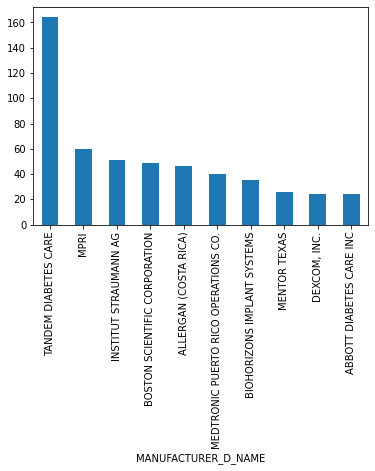

In [78]:
agent.run("Create a graph of the top 10 manufacturers by number of reports received.")